### 连接驱动器

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Code

/content/drive/MyDrive/Code


### Data:


In [2]:
import yfinance as yf
from datetime import datetime

#### 从雅虎金融库获取股票数据
`时间：2000-01-01至当前日期`

In [3]:
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

In [4]:
acer = yf.download('2353.TW', start=start_date, end=end_date)  # Acer Inc: công ty máy tính Đài Loan
TSMC = yf.download('2330.TW', start=start_date, end=end_date) # TSMC: công ty sản xuất chip Đài Loan
AUO = yf.download('2409.TW', start=start_date, end=end_date) # AUO: công ty sản xuất màn hình Đài Loan

Failed to get ticker '2353.TW' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['2353.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Failed to get ticker '2330.TW' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['2330.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Failed to get ticker '2409.TW' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['2409.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [5]:
# 将数据保存到csv文件
acer.to_csv('acer.csv')
TSMC.to_csv('TSMC.csv')
AUO.to_csv('AUO.csv')

### import thư viện

In [15]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
 
from tensorflow.python.ops import control_flow_ops # 数据流控制库


In [16]:
print(tf.__version__)

2.13.0


### 数据读取和数据预处理

In [9]:
# 从csv文件读取数据
df_TSMC = pd.read_csv('TSMC.csv')
df_acer = pd.read_csv('acer.csv')
df_AUO = pd.read_csv('AUO.csv')

# 3个数据集的长度
len(df_acer), len(df_TSMC), len(df_AUO)

(5769, 5834, 5656)

*获取关闭的数据列*
收盘价：股票收盘价
-用于预测股票收盘价

In [11]:
p = df_acer['Close'].values.astype('float32')

###Visualization
`Stock target choose`

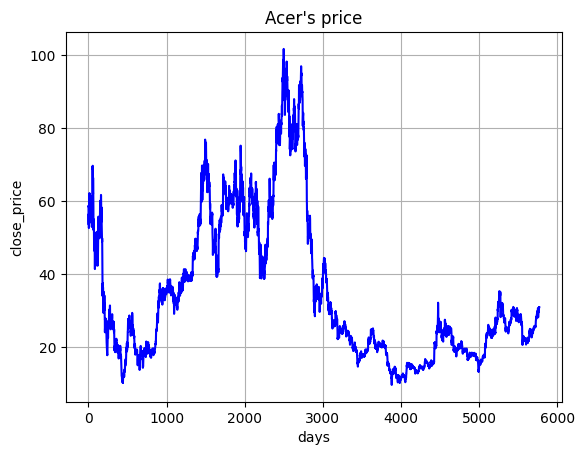

In [13]:
plt.plot(p, color='blue')
plt.title("Acer's price")
plt.ylabel('close_price')
plt.xlabel('days')
plt.grid()
plt.show()

In [19]:
# n 这是p的元素数。
# z 这是一个包含p元素的数组，减去其后面的元素
n = len(p)
z = np.array([p[i+1] - p[i] for i in range(n-1)])
print(z.shape)

(5768,)


In [20]:
# m 是输入值的数量
# ts 时间步骤的数量
# c 是交易成本
m = 50  # no of price ticks[inputs]
ts = n - m  # time steps
c = 0  # transaction cost 

# batch_size: 一次输入计算网络的数据样本数
# numClusters: 集群数量
batch_size = 5 
numClusters = 3

“create_batch_generator”函数是一个用于输入数据的批处理生成器函数，默认批处理大小为“20”。 <br>
此函数创建`X`的副本，并使用循环将`X`拆分为较小的批处理。 <br>
每次迭代，函数都会返回一个由两个元素组成的元组：当前批处理和下一批处理的最后一个元素。


In [21]:
def create_batch_generator(X, batch_size=20):
    X_copy = np.array(X)
    for i in range(0, X.shape[0], batch_size):
        yield (X_copy[i:i+batch_size, :], X_copy[i+1:i+1+batch_size, -1])

### 创建和构建tf-graph1图

In [22]:
g1 = tf.Graph()

with g1.as_default():
    tf.compat.v1.set_random_seed(123)
    features = tf.compat.v1.placeholder(tf.float32, shape=[None], name='features')  
    l = tf.compat.v1.placeholder(tf.float32, shape=[None], name='l')
    with tf.compat.v1.variable_scope("data_pre"):
        def slice_data(features, l): 
            temp_list = []
            for i in range(1, ts + 1):
                f = tf.slice(features, [i - 1], [m])
                temp_list.append(f)
            l = tf.stack(temp_list)
            return l
        slice_l = slice_data(features, l)

        init = tf.compat.v1.global_variables_initializer()
        
# Thực thi g1 để tạo slice_z
with tf.compat.v1.Session(graph=g1) as sess:
    sess.run(init)
    slice_z = sess.run(slice_l, feed_dict={features: z, l: []})

### 创建和构建TF图形
`DRL没有FRDNN

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Epochs :  1
[-0.3264442  0.9095285  0.9507589  0.9807389  0.9039876]
[[-0.00326443]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]]
[ 3.8871841   4.185833    4.484474   -0.59729004  0.59729004]
[-8.060328]
Batch Times :  1 Current_total_reward : 8.060327529907227
[0.92470825 0.9850596  0.85978234 0.9844603  0.91042084]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[ 0.29864502 -3.8871918  -2.991253    0.         -0.89593124]
[6.5797997]
Batch Times :  2 Current_total_reward : 1.4805278778076172
[0.6805323  0.97383547 0.17390788 0.89502454 0.6915583 ]
[[1.        ]
 [1.        ]
 [0.00173908]
 [1.        ]
 [1.        ]]
[ 4.484474   -2.0905075  -1.4980354  -4.185829   -0.29864502]
[1.7944677]
Batch Times :  3 Current_total_reward : -0.31393980979919434
[-0.2291139  0.5510295  0.0563114  0.9754329  0.9109731]
[[-2.2911346e-03]
 [ 1.0000000e+00]
 [ 5.6311383e-04]
 [ 1.0000000e+00]
 [ 1.0000000e+

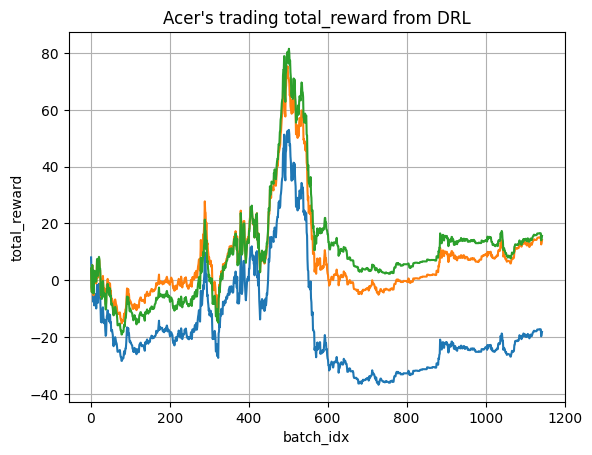

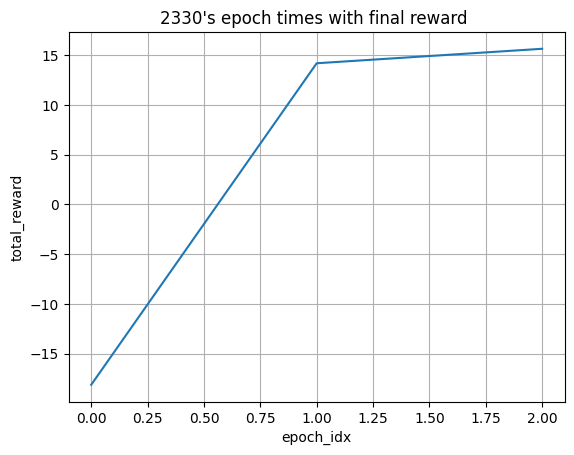

In [23]:
g = tf.Graph() 

with g.as_default(): 
    tf.compat.v1.set_random_seed(123)
    # placeholder: tạo một vùng nhớ để lưu trữ dữ liệu đầu vào
    batch__X = tf.compat.v1.placeholder(tf.float32, shape=[None, 50], name='batch__X') # giá trị đầu vào
    next__z = tf.compat.v1.placeholder(tf.float32, shape=[None], name='next__z') # z tại thời điểm t+1

    # Tạo autoencoder: là một lớp ẩn, đầu vào là fuzzyOut, đầu ra là AE_out
    with tf.compat.v1.variable_scope("AutoEncoder"):
        h1 = tf.keras.layers.Dense(units=100, activation=tf.nn.leaky_relu)(batch__X)
        h2 = tf.keras.layers.Dense(units=60, activation=tf.nn.leaky_relu)(h1)
        h3 = tf.keras.layers.Dense(units=40, activation=tf.nn.leaky_relu)(h2)
        h4 = tf.keras.layers.Dense(units=30, activation=tf.nn.leaky_relu)(h3)
        AE_out = tf.keras.layers.Dense(units=10)(h4)

    # DRL: Deep Reinforcement Learning
    # delta được tính bằng công thức (8) trong paper
    with tf.compat.v1.variable_scope("DRL"):
        rnn_In = tf.reshape(tensor=AE_out, shape=[1, batch_size, 10], name="reshape1")
        rnn_cell = tf.keras.layers.SimpleRNNCell(units=1, activation=tf.tanh)
        initial_state = rnn_cell.get_initial_state(batch_size=1, dtype=tf.float32)
        delta, final_state = tf.compat.v1.nn.dynamic_rnn(rnn_cell, rnn_In, initial_state=initial_state, dtype=tf.float32, time_major=False)


        delta = tf.reshape(tensor=delta, shape=[batch_size]) # reshape delta về dạng (batch_size, 1)
        d = delta # d là delta sau khi reshape

        # đưa delta về dạng [-1, 1] bằng hàm tanh 
        delta = tf.map_fn(
            lambda x: tf.case(
                pred_fn_pairs=[
                    (tf.greater(x, 0.33), lambda: tf.math.tanh(x*100)),
                    (tf.less(x, -0.33), lambda: tf.math.tanh(x*100))],
                default=lambda: tf.math.tanh(x/100)), delta)

        delta = tf.reshape(tensor=delta, shape=[batch_size, 1]) 

    # Tính UT_loss 
    with tf.compat.v1.variable_scope("UT_loss"):
        # hàm tính UT 
        def cal_UT(delta, next__z):
            r = []
            for i in range(1, delta.shape[0]):
                Rt = delta[i - 1] * next__z[i - 1] - c * tf.abs(delta[i] - delta[i - 1]) # công thức (1) trong paper
                r.append(Rt) 
            UT = sum(r) 
            return UT 

        loss = (-1) * cal_UT(delta, next__z) # loss = (-1) * UT

    # Tạo optimizer để tối ưu hóa loss
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01) 
    # tạo train_op để thực hiện quá trình tối ưu hóa
    train_op = optimizer.minimize(loss=loss)
    # khởi tạo các biến trong graph g 
    init = tf.compat.v1.global_variables_initializer()

# thực thi graph g
with tf.compat.v1.Session(graph=g) as sess:
    sess.run(init) 
    each_epoch_total_reward = []
    epoch_times = []         
    for i in range(3):  # epoch = 20 
        epoch_total_reward = [] 
        batch_idx = []      
        count = 0
        current_total_loss = 0 
        batch_generator = create_batch_generator(slice_z, batch_size=batch_size)
        print("Epochs : ", i + 1)
        for batch_X, next_z in batch_generator:
            if batch_X.shape == (batch_size, 50):
                count += 1
                _, total_loss, d_out, delta_out, next_one = sess.run([train_op, loss, d, delta, next__z], feed_dict={batch__X: batch_X, next__z: next_z})
                print(d_out)
                print(delta_out) 
                print(next_one) 
                print(total_loss)

                current_total_loss += total_loss[0] # cộng dồn loss của một epoch 
                print("Batch Times : ", count, "Current_total_reward :", (-1) * current_total_loss) # in ra số lần lặp của một batch và tổng reward của một epoch
                epoch_total_reward.append((-1)*current_total_loss) # thêm tổng reward của một batch vào epoch_total_reward
                batch_idx.append(count) # thêm số lần lặp của một batch vào batch_idx

        each_epoch_total_reward.append((-1) * current_total_loss) # thêm tổng reward của một epoch vào each_epoch_total_reward
        epoch_times.append(i) # thêm số lần lặp của một epoch vào epoch_times 
        print("\n==================================================\n")

        plt.title("Acer's trading total_reward from DRL")
        plt.xlabel('batch_idx')
        plt.ylabel('total_reward')
        plt.plot(batch_idx, epoch_total_reward)
    plt.grid()
    plt.show()
    print("\n==================================================\n")
    plt.title("2330's epoch times with final reward ")
    plt.xlabel('epoch_idx')
    plt.ylabel('total_reward')
    plt.plot(epoch_times, each_epoch_total_reward)
    plt.grid()
    plt.show()

### Khởi tạo và xây dựng đồ thị TF-Graph
`FRDNN`

Epochs :  1
[1.         1.         0.99955577 0.9620216  0.99929345]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[ 3.8871841   4.185833    4.484474   -0.59729004  0.59729004]
[-11.960201]
Batch Times :  1 Current_total_reward : 11.960201263427734
[1.        1.        0.9959698 0.9998648 0.9912777]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[ 0.29864502 -3.8871918  -2.991253    0.         -0.89593124]
[6.5797997]
Batch Times :  2 Current_total_reward : 5.380401611328125
[ 1.         -0.99976325 -0.66757303  0.22061214  0.9999873 ]
[[ 1.        ]
 [-1.        ]
 [-1.        ]
 [ 0.00220612]
 [ 1.        ]]
[ 4.484474   -2.0905075  -1.4980354  -4.185829   -0.29864502]
[-8.063783]
Batch Times :  3 Current_total_reward : 13.444184303283691
[ 1.          1.         -0.94577235  0.99948984  0.9181001 ]
[[ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]]
[-5.9776917  2.0905075 -2.3891525  1.1945763  1.7966805]
[0.30345535]
Batch Times :  4 Current_total_reward : 13.140728950500488
[ 1.          1.          0.99999976 -0.99836105  0.9

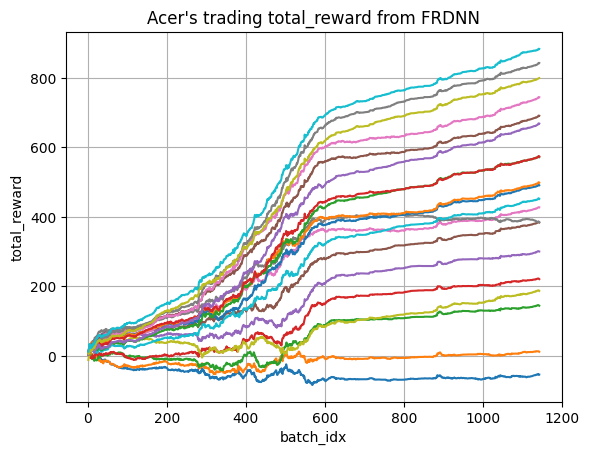

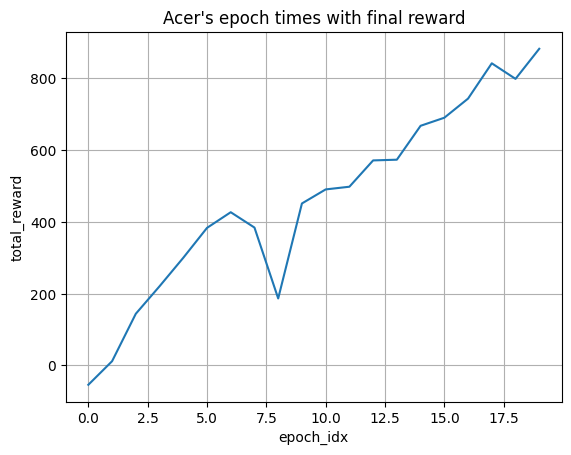

In [24]:
g2 = tf.Graph() 

with g2.as_default(): 
    tf.compat.v1.set_random_seed(123)
    # placeholder: 创建存储输入数据的内存区域
    batch__X = tf.compat.v1.placeholder(tf.float32, shape=[None, 50], name='batch__X') # 输入值
    next__z = tf.compat.v1.placeholder(tf.float32, shape=[None], name='next__z') # z 在时间t+1

    # 使用k-means对输入数据进行聚类以创建模糊层
    with tf.compat.v1.variable_scope("k-means"):
        total_data = np.asarray(a=slice_z, dtype=np.float32) 
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
        flags = cv2.KMEANS_RANDOM_CENTERS  # 随机选择心形群
        compactness, label_kmeans, centers = cv2.kmeans(
            data=total_data, K=3, bestLabels=None, criteria=criteria, attempts=10, flags=flags)
        # 将数据分为三类。
        List0 = [] 
        List1 = [] 
        List2 = [] 
        # 每种类型的平均值和变量
        for ii in range(n-m):
            if 0 == label_kmeans[ii][0]: 
                List0.append(total_data[ii]) 
            if 1 == label_kmeans[ii][0]:
                List1.append(total_data[ii])
            if 2 == label_kmeans[ii][0]:
                List2.append(total_data[ii])
        mean0, variance0 = np.mean(List0, axis=0), np.var(List0, axis=0) 
        mean1, variance1 = np.mean(List1, axis=0), np.var(List1, axis=0)
        mean2, variance2 = np.mean(List2, axis=0), np.var(List2, axis=0)

    # # fuzzy layer是一个隐藏层，输入为batch__X，输出为fuzzyOut。
    with tf.compat.v1.variable_scope("fuzzy-layer"):
        # 在论文中获取公式（7）的负值
        fuzzy0 = tf.exp(tf.negative(tf.nn.batch_normalization(x=batch__X, mean=mean0,
                                                              variance=variance0, offset=None, scale=None,
                                                              variance_epsilon=0.001)))
        fuzzy1 = tf.exp(tf.negative(tf.nn.batch_normalization(x=batch__X, mean=mean1,
                                                              variance=variance1, offset=None, scale=None,
                                                              variance_epsilon=0.001)))
        fuzzy2 = tf.exp(tf.negative(tf.nn.batch_normalization(x=batch__X, mean=mean2,
                                                              variance=variance2, offset=None, scale=None,
                                                              variance_epsilon=0.001)))
        fuzzyOut = tf.concat(values=[fuzzy0, fuzzy1, fuzzy2], axis=0, name="FuzzyOut")  # 三层模糊
        fuzzyOut = tf.reshape(tensor=fuzzyOut, shape=[batch_size, 150])

    # 创建autoencoder：隐藏类，输入fuzzyOut，输出AE_out
    with tf.compat.v1.variable_scope("AutoEncoder"):
        h1 = tf.keras.layers.Dense(units=100, activation=tf.nn.leaky_relu)(fuzzyOut)
        h2 = tf.keras.layers.Dense(units=60, activation=tf.nn.leaky_relu)(h1)
        h3 = tf.keras.layers.Dense(units=40, activation=tf.nn.leaky_relu)(h2)
        h4 = tf.keras.layers.Dense(units=30, activation=tf.nn.leaky_relu)(h3)
        AE_out = tf.keras.layers.Dense(units=10)(h4)

    # DRL: Deep Reinforcement Learning
    # delta是用纸中的公式（8）计算的。
    with tf.compat.v1.variable_scope("DRL"):
        rnn_In = tf.reshape(tensor=AE_out, shape=[1, batch_size, 10], name="reshape1")
        rnn_cell = tf.keras.layers.SimpleRNNCell(units=1, activation=tf.tanh)
        initial_state = rnn_cell.get_initial_state(batch_size=1, dtype=tf.float32)
        delta, final_state = tf.compat.v1.nn.dynamic_rnn(rnn_cell, rnn_In, initial_state=initial_state, dtype=tf.float32, time_major=False)


        delta = tf.reshape(tensor=delta, shape=[batch_size]) # reshape delta về dạng (batch_size, 1)将delta转换为batch_size，1
        d = delta # d là delta sau khi reshape 重建后的三角洲。

        # đưa delta về dạng [-1, 1] bằng hàm tanh 将δ转换为[-1，1]。
        delta = tf.map_fn(
            lambda x: tf.case(
                pred_fn_pairs=[
                    (tf.greater(x, 0.33), lambda: tf.math.tanh(x*100)),
                    (tf.less(x, -0.33), lambda: tf.math.tanh(x*100))],
                default=lambda: tf.math.tanh(x/100)), delta)

        delta = tf.reshape(tensor=delta, shape=[batch_size, 1]) 

    # Tính UT_loss 
    with tf.compat.v1.variable_scope("UT_loss"):
        # hàm tính UT 
        def cal_UT(delta, next__z):
            r = []
            for i in range(1, delta.shape[0]):
                Rt = delta[i - 1] * next__z[i - 1] - c * tf.abs(delta[i] - delta[i - 1]) # công thức (1) trong paper
                r.append(Rt) 
            UT = sum(r) 
            return UT 

        loss = (-1) * cal_UT(delta, next__z) # loss = (-1) * UT

    # Tạo optimizer để tối ưu hóa loss
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01) 
    # tạo train_op để thực hiện quá trình tối ưu hóa
    train_op = optimizer.minimize(loss=loss)
    # khởi tạo các biến trong graph g 
    init = tf.compat.v1.global_variables_initializer()

# thực thi graph g
with tf.compat.v1.Session(graph=g2) as sess:
    sess.run(init) 
    each_epoch_total_reward = []
    epoch_times = []         
    for i in range(20):  # epoch = 20 
        epoch_total_reward = [] 
        batch_idx = []      
        count = 0
        current_total_loss = 0 
        batch_generator = create_batch_generator(slice_z, batch_size=batch_size)
        print("Epochs : ", i + 1)
        for batch_X, next_z in batch_generator:
            if batch_X.shape == (batch_size, 50):
                count += 1
                _, total_loss, d_out, delta_out, next_one = sess.run([train_op, loss, d, delta, next__z], feed_dict={batch__X: batch_X, next__z: next_z})
                print(d_out)
                print(delta_out) 
                print(next_one) 
                print(total_loss)

                current_total_loss += total_loss[0] # cộng dồn loss của một epoch 
                print("Batch Times : ", count, "Current_total_reward :", (-1) * current_total_loss) # in ra số lần lặp của một batch và tổng reward của một epoch
                epoch_total_reward.append((-1)*current_total_loss) # thêm tổng reward của một batch vào epoch_total_reward
                batch_idx.append(count) # thêm số lần lặp của một batch vào batch_idx

        each_epoch_total_reward.append((-1) * current_total_loss) # thêm tổng reward của một epoch vào each_epoch_total_reward
        epoch_times.append(i) # thêm số lần lặp của một epoch vào epoch_times 
        print("\n==================================================\n")

        plt.title("Acer's trading total_reward from FRDNN")
        plt.xlabel('batch_idx')
        plt.ylabel('total_reward')
        plt.plot(batch_idx, epoch_total_reward)
    plt.grid()
    plt.show()
    print("\n==================================================\n")
    plt.title("Acer's epoch times with final reward")
    plt.xlabel('epoch_idx')
    plt.ylabel('total_reward')
    plt.plot(epoch_times, each_epoch_total_reward)
    plt.grid()
    plt.show()